Exploring Dandiset 001275: Mental Navigation in Primates

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview of Dandiset 001275

This dataset contains neurophysiology data collected from two primates during a mental navigation task associated with a previously published study (https://doi.org/10.1038/s41586-024-07557-z).

- [Neurosift Link](https://neurosift.app/dandiset/001275)

This notebook will guide you through loading and visualizing data from this Dandiset.

## What this notebook will cover:

1.  Loading the Dandiset using the DANDI API.
2.  Loading an NWB file from the Dandiset.
3.  Exploring and visualizing data from the NWB file, including eye position and hand position data.
4.  Examining trial data.

## Required Packages

The following packages are required to run this notebook. Make sure they are installed in your environment.

-   pynwb
-   h5py
-   remfile
-   matplotlib
-   numpy
-   seaborn

In [1]:
# Load required packages
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading the Dandiset

Use the DANDI API to connect to the Dandiset.

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 20 assets in the dataset
\nFirst 5 assets:
- sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb


## Loading an NWB File

We will load the file `sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb` to demonstrate how to access data.
This file was chosen because it's relatively small.
The URL for this asset is: https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/

In [3]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x140037429681680
Fields:
  devices: {
    vprobe0 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    vprobe0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experimenter: ['Neupane, Sujaya']
  file_create_date: [datetime.datetime(2025, 2, 10, 15, 59, 32, 811962, tzinfo=tzoffset(None, -18000))]
  identifier: 15de6847-1f57-4247-847b-af4b179d1b7c
  institution: MIT
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Jazayeri, Fiete
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.
  session_id: 01042020
  session_start_time: 2020-01-04 00:00:00-05:00
  subject: subject pynwb.file.Subject at 0x140037429421136
Fields:
  age: P10Y
  age__reference: birth
  sex: M
  species: Macaca mulatta
  subject_id: amadeus

  timestamps_reference_time: 2020-01-04 00:00:00-05:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

## Exploring NWB File Metadata

Let's explore some of the metadata in the NWB file.

In [4]:
nwb.session_description  # (str) Data from macaque performing mental navigation task. Subject is presented with a start and a targ...

'Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.'

In [5]:
nwb.identifier  # (str) 15de6847-1f57-4247-847b-af4b179d1b7c

'15de6847-1f57-4247-847b-af4b179d1b7c'

In [6]:
nwb.session_start_time  # (datetime) 2020-01-04T00:00:00-05:00

datetime.datetime(2020, 1, 4, 0, 0, tzinfo=tzoffset(None, -18000))

## Exploring Behavior Data (Eye Position)

Let's load and visualize some eye position data.

In [7]:
eye_position_data = nwb.processing["behavior"].data_interfaces["eye_position"].data
eye_position_timestamps = nwb.processing["behavior"].data_interfaces["eye_position"].timestamps

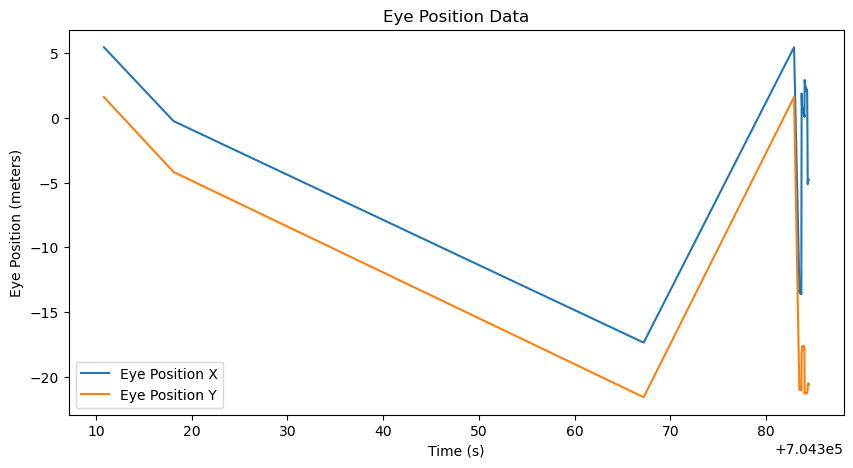

In [8]:
# Plot the first 10 seconds of eye position data
duration = 10  # seconds
sample_rate = 100  # samples per second
num_samples = duration * sample_rate
eye_position_data_subset = eye_position_data[:num_samples, :]
eye_position_timestamps_subset = eye_position_timestamps[:num_samples]

plt.figure(figsize=(10, 5))
plt.plot(eye_position_timestamps_subset, eye_position_data_subset[:, 0], label="Eye Position X")
plt.plot(eye_position_timestamps_subset, eye_position_data_subset[:, 1], label="Eye Position Y")
plt.xlabel("Time (s)")
plt.ylabel("Eye Position (meters)")
plt.title("Eye Position Data")
plt.legend()
plt.show()

The above plot shows the eye position data for the first 10 seconds of the recording. You can see the X and Y coordinates of the eye position over time.

## Exploring Behavior Data (Hand Position)

Let's load and visualize some hand position data.

In [9]:
hand_position_data = nwb.processing["behavior"].data_interfaces["hand_position"].data
hand_position_timestamps = nwb.processing["behavior"].data_interfaces["hand_position"].timestamps

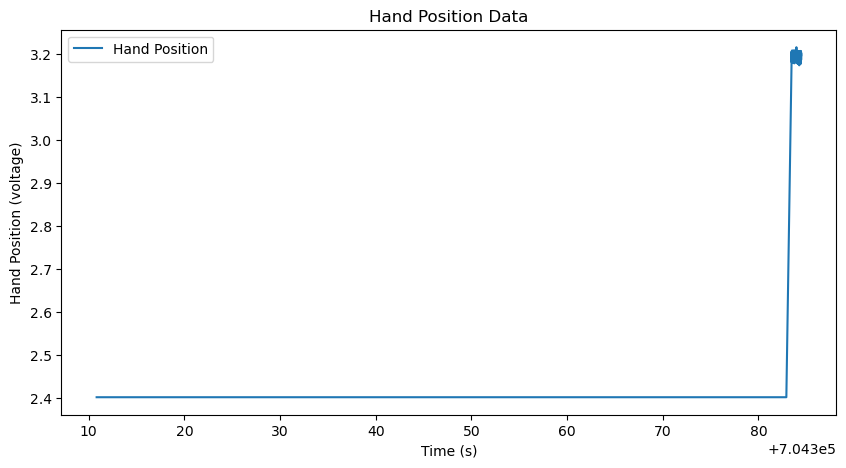

In [10]:
# Plot the first 10 seconds of hand position data
duration = 10  # seconds
sample_rate = 100  # samples per second
num_samples = duration * sample_rate
hand_position_data_subset = hand_position_data[:num_samples]
hand_position_timestamps_subset = hand_position_timestamps[:num_samples]

plt.figure(figsize=(10, 5))
plt.plot(hand_position_timestamps_subset, hand_position_data_subset, label="Hand Position")
plt.xlabel("Time (s)")
plt.ylabel("Hand Position (voltage)")
plt.title("Hand Position Data")
plt.legend()
plt.show()

The above plot shows the hand position data for the first 10 seconds of the recording.

## Exploring Trial Data

Let's view data from the `trials` table.

In [11]:
nwb.trials.to_dataframe().head()

,start_time,stop_time,ta,tp,curr,target,rt,delay,trial_type,seqq,succ,attempt,numrepeat,validtrials_mm,gocuettl,joy1offttl,joy1onttl,stim1onttl
id,,,,,,,,,,,,,,,,,,
0,4.223633,11.637167,-3.25,-2.133334,6.0,1.0,0.732311,450184.305501,3.0,1.0,0.0,2.0,0.0,1.0,5.110167,8.002300,5.860100,4.223633
1,11.637167,16.953933,-3.25,-3.066644,6.0,1.0,0.402226,512311.706711,3.0,1.0,1.0,1.0,1.0,1.0,12.586900,16.085500,13.013433,11.637167
2,16.953933,21.459433,-1.95,-1.850000,6.0,3.0,0.343430,986090.813525,3.0,1.0,1.0,1.0,0.0,1.0,18.380400,20.595133,18.738167,16.953933
3,21.459433,24.476100,-0.65,-0.649999,5.0,4.0,0.367689,682881.669062,3.0,1.0,1.0,1.0,0.0,1.0,22.578867,23.612467,22.964267,21.459433
4,24.476100,28.174800,-1.30,-1.083340,4.0,2.0,0.657287,641646.440716,3.0,1.0,1.0,1.0,0.0,1.0,25.554433,27.312467,26.220600,24.476100


We are displaying the first 5 rows of the trials table, including start time, stop time, and other trial-related data.

## Exploring Units Data

Now let's explore the ecephys data, starting with the units table.

In [12]:
units = nwb.processing["ecephys"].data_interfaces["units"]
units.to_dataframe().head()

,spike_times,unit_name,amp,ch,ContamPct,original_cluster_id,Amplitude,n_spikes,depth,quality,sh,KSLabel,fr
id,,,,,,,,,,,,,
0,"[0.0065, 1.2116333333333333, 1.240666666666666...",2,3.378150,2.0,10.2,2.0,53.4,97283.0,3.0,good,0.0,mua,7.005173
1,"[0.22823333333333334, 3.5122666666666666, 4.23...",3,2.290662,2.0,9.5,3.0,25.7,168710.0,3.0,good,0.0,good,12.148501
2,"[262.66853333333336, 834.9403666666667, 971.70...",9,1.874952,4.0,100.0,9.0,24.3,76.0,5.0,noise,0.0,good,0.005473
3,"[0.11906666666666667, 0.12373333333333333, 0.2...",11,2.795727,5.0,9.8,11.0,34.9,159662.0,6.0,good,0.0,good,11.496971
4,"[0.10633333333333334, 0.3126, 0.63833333333333...",12,1.580371,11.0,129.2,12.0,20.2,67926.0,12.0,noise,0.0,mua,4.891228


## Summary and Future Directions

This notebook demonstrated how to load and visualize data from Dandiset 001275 using the DANDI API and PyNWB. We explored eye position, hand position, and trial data.

Possible future directions for analysis include:

-   Analyzing the relationship between eye position and hand position during the mental navigation task.
-   Investigating the neural activity recorded in the ecephys data.
-   Performing more detailed analysis of the trial data to understand the task performance.